In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pickle

In [2]:
def load_npz_data():
    """
    Returns:
        tuple: (X_train, y_train, X_test, y_test)
    """
    train_file = 'E:\\CelebMatch\\Dataset\\train.npz'
    test_file = 'E:\\CelebMatch\\Dataset\\test.npz'
    
    # Tải train.npz
    train_data = np.load(train_file)
    X_train = train_data["embeddings"]
    y_train = train_data["labels"]
    
    # Tải test.npz
    test_data = np.load(test_file)
    X_test = test_data["embeddings"]
    y_test = test_data["labels"]
    
    print(f"Train data: {X_train.shape}, Labels: {y_train.shape}")
    print(f"Test data: {X_test.shape}, Labels: {y_test.shape}")
    print(f"Nhãn duy nhất trong train: {np.unique(y_train)}")
    print(f"Nhãn duy nhất trong test: {np.unique(y_test)}")
    
    return X_train, y_train, X_test, y_test

Train data: (917, 512), Labels: (917,)
Test data: (60, 512), Labels: (60,)
Nhãn duy nhất trong train: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Nhãn duy nhất trong test: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

Huấn luyện SVM trên toàn bộ dữ liệu train...
Train Accuracy: 1.0000
Test Accuracy: 0.8167


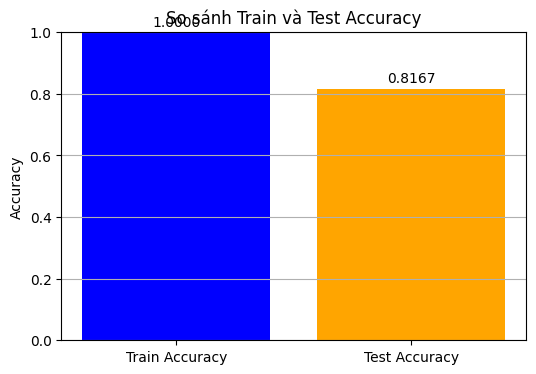


Classification Report trên tập test:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.50      0.50      0.50         2
          10       0.50      1.00      0.67         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       0.50      1.00      0.67         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00

E:\CelebMatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\CelebMatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\CelebMatch\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
X_train, y_train, X_test, y_test = load_npz_data()

# Thiết lập tham số mặc định nếu không truyền params
params = {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability':True}

# Khởi tạo và huấn luyện SVM trên toàn bộ X_train
print("\nHuấn luyện SVM trên toàn bộ dữ liệu train...")
svm_model = SVC(**params, random_state=42)
svm_model.fit(X_train, y_train)

# Đánh giá trên tập train
train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

# Đánh giá trên tập test
test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Vẽ biểu đồ so sánh train và test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('So sánh Train và Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([train_accuracy, test_accuracy]):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.grid(True, axis='y')
plt.show()

# In classification report trên tập test
print("\nClassification Report trên tập test:")
print(classification_report(y_test, test_pred))

# Lưu mô hình vào file .pkl
with open('E:\\CelebMatch\\Models\\svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print("\nMô hình đã được lưu vào 'svm_model.pkl'")